In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('D:\Test\Temp2.csv')
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [76]:
df.shape

(36, 2)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [78]:
date = pd.date_range(start='1/1/2001', end='12/31/2004', freq='M')
#date

In [79]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])

In [97]:
df.head()

,Month,Sales
Time_Stamp,,
2001-01-31,1-01,266.0
2001-02-28,1-02,145.9
2001-03-31,1-03,183.1
2001-04-30,1-04,119.3
2001-05-31,1-05,180.3


In [81]:
df = df.set_index('Time_Stamp')

In [82]:
#df.head()

In [83]:
df1 = df.drop(['Month'],axis=1)

In [84]:
#df1.head()

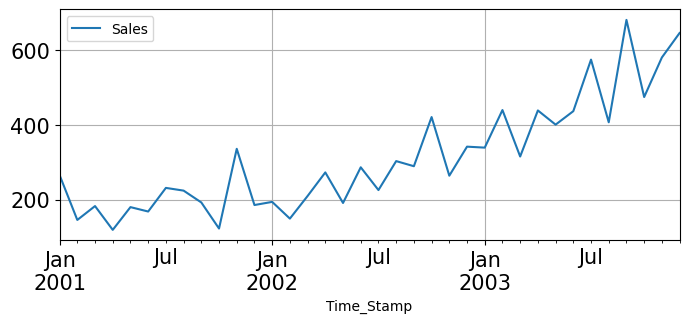

In [85]:
df1.plot(figsize=(8,3))
plt.grid();

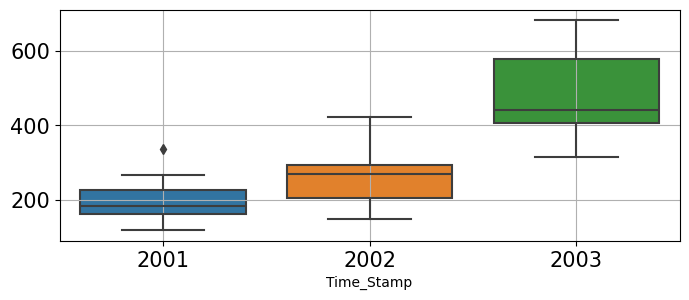

In [86]:
#EDA
_,ax = plt.subplots(figsize=(8,3))
sns.boxplot(x=df1.index.year, y=df1.values[:,0],ax=ax)
plt.grid();

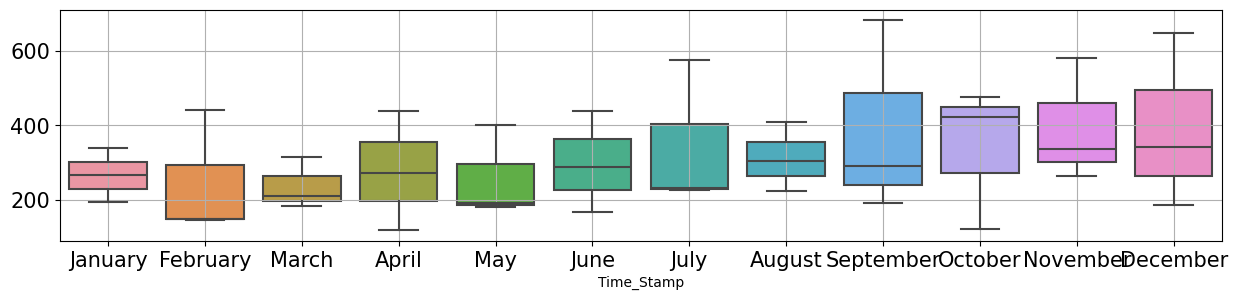

In [88]:
_,ax = plt.subplots(figsize=(15,3))
sns.boxplot(x=df1.index.month_name(), y=df1.values[:,0],ax=ax)
plt.grid();

In [89]:
monthly_sales = pd.pivot_table(df1, 
                               values='Sales', 
                               columns=df1.index.month_name(),
                               index=df1.index.year)

In [98]:
monthly_sales 

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2001,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2002,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2003,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


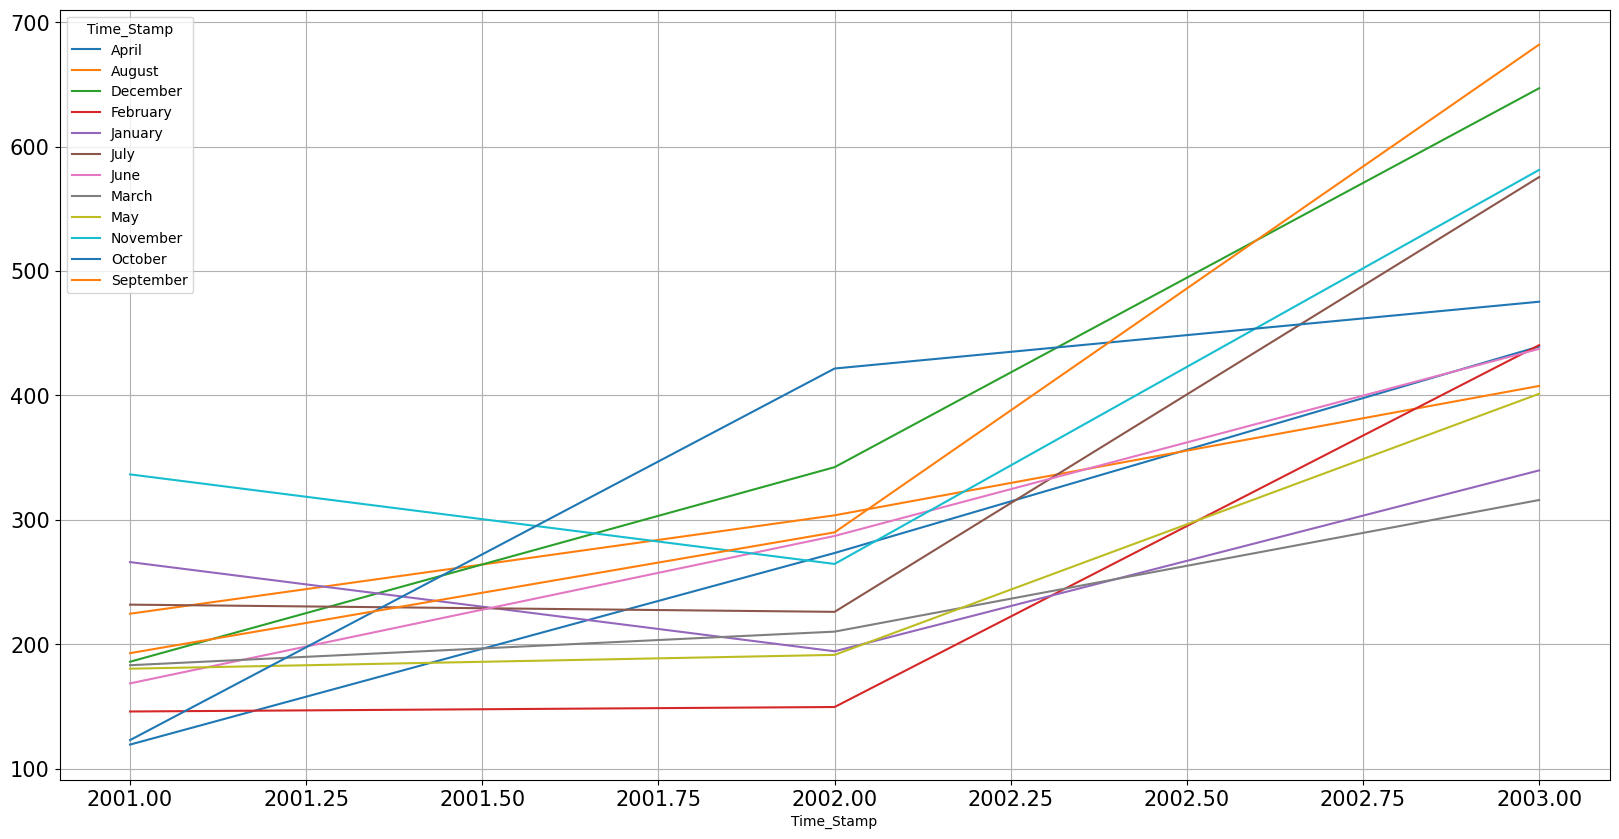

In [91]:
monthly_sales.plot(figsize=(20,10))
plt.grid();

In [93]:
quaterly_turnover = pd.pivot_table(df1,
                                values="Sales", 
                               columns=df1.index.quarter,
                               index=df1.index.year)

In [94]:
quaterly_turnover

Time_Stamp,1,2,3,4
Time_Stamp,,,,
2001,198.333333,156.033333,216.366667,215.100000
2002,184.633333,250.566667,273.166667,342.800000
2003,365.333333,426.000000,555.033333,567.833333


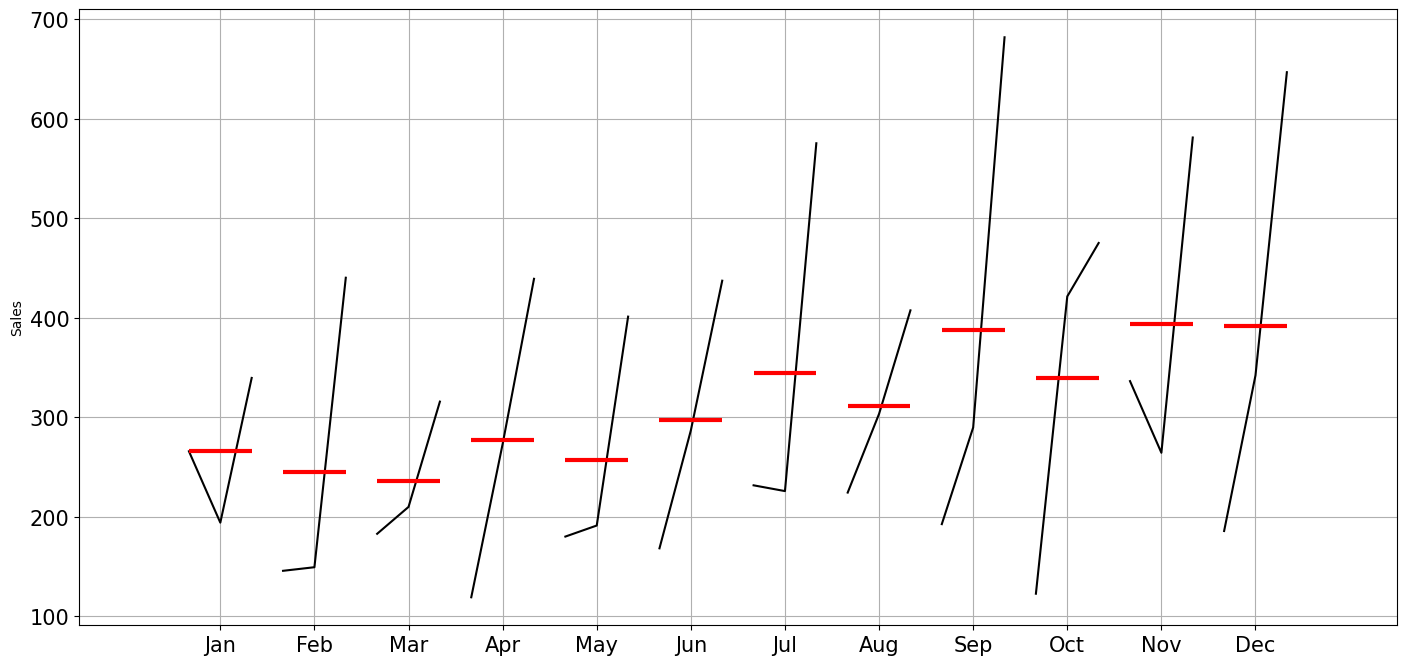

In [99]:
from pylab import rcParams
rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df1['Sales'],ylabel='Sales')
plt.grid();


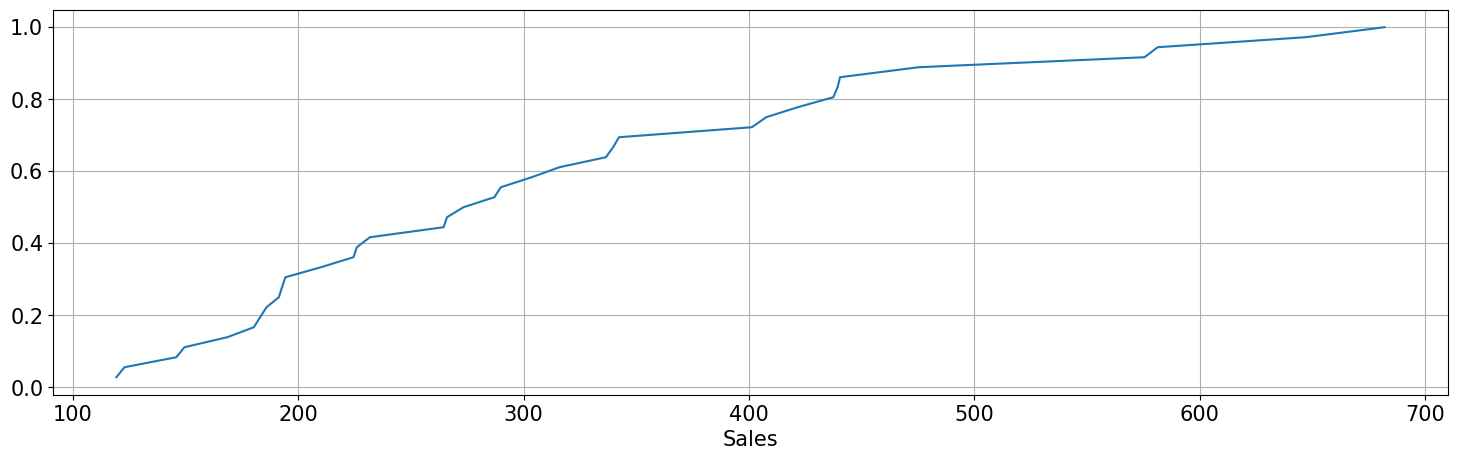

In [95]:
 #statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 5))
cdf = ECDF(df1['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);

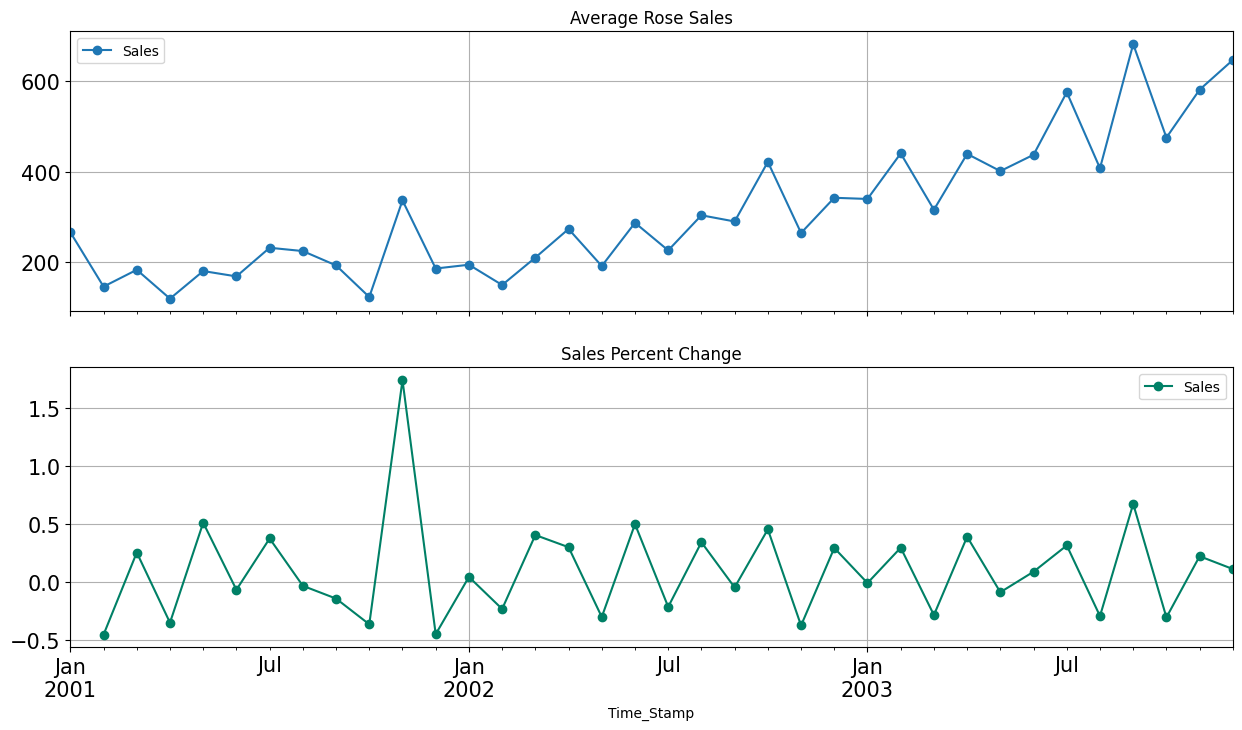

In [96]:
# group by date and get average Customers, and precent change
average    = df1.groupby(df1.index)["Sales"].mean()
pct_change = df1.groupby(df1.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

#Number of customer over year-month

ax1 = average.plot(legend=True,
                   ax=axis1,
                   marker='o',
                   title="Average Rose Sales",
                   grid=True)

ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for over year-month
ax2 = pct_change.plot(legend=True,
                      ax=axis2,
                      marker='o',
                      colormap="summer",
                      title="Sales Percent Change",
                      grid=True)

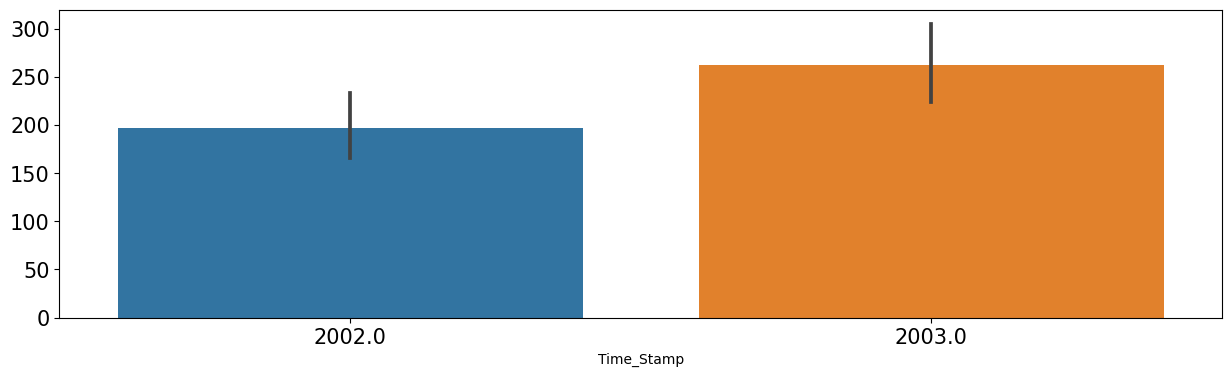

In [70]:
## Plot sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df1.index.year, y=df1.values[:,0], data=df1, ax=axis1);


In [71]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sales', 
                                            columns = df1.index.month_name(), 
                                            index = df1.index.year)
yearly_total_sales = monthly_sales_across_years.sum(axis = 1, skipna = True) 
yearly_total_sales

Time_Stamp
2002.0    2357.5
2003.0    3153.5
dtype: float64

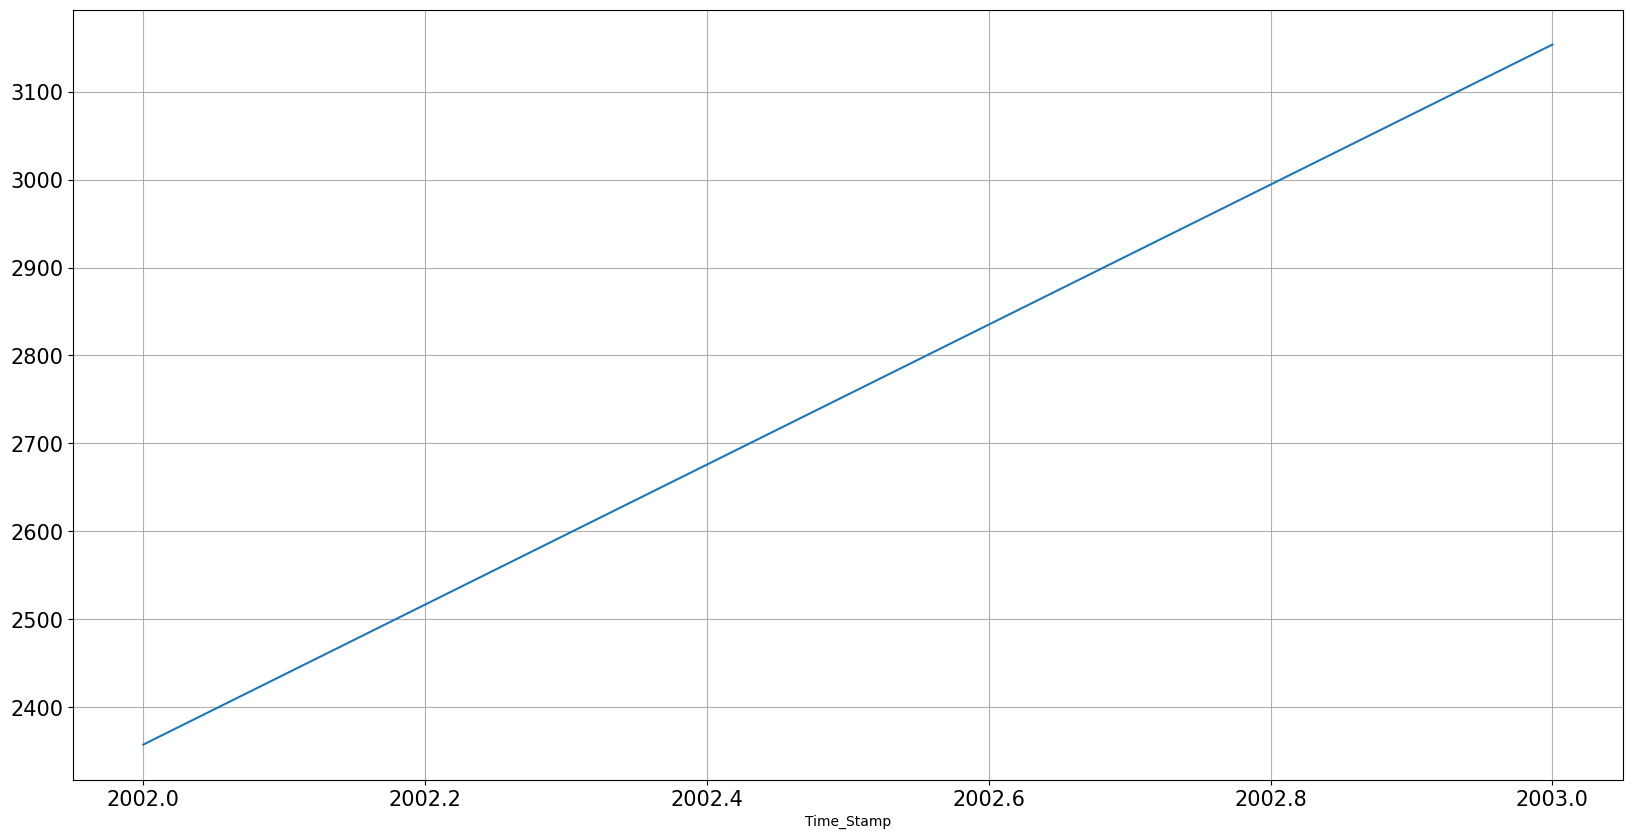

In [72]:
yearly_total_sales.plot(figsize=(20,10))
plt.grid()